# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Parametric experiments on g.d.
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Running experiments to understand gradient descent

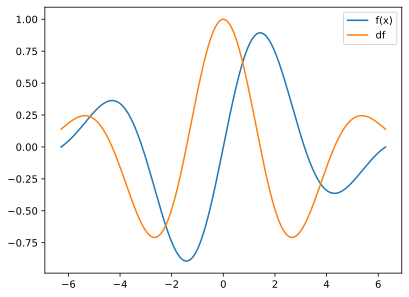

In [2]:
# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df']);

In [3]:
# function (note: over-writing variable names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

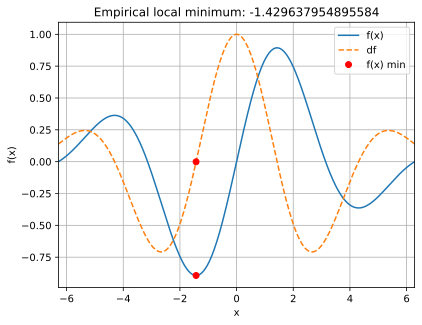

In [16]:
# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad



# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


# Run parametric experiments

In [18]:
startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

In [22]:
for idx,localmin in enumerate(startlocs):
    print(idx), print(''), print(localmin)

0

-5.0
1

-4.795918367346939
2

-4.591836734693878
3

-4.387755102040816
4

-4.183673469387755
5

-3.979591836734694
6

-3.7755102040816326
7

-3.571428571428571
8

-3.36734693877551
9

-3.163265306122449
10

-2.9591836734693877
11

-2.7551020408163263
12

-2.5510204081632653
13

-2.3469387755102042
14

-2.142857142857143
15

-1.9387755102040813
16

-1.7346938775510203
17

-1.5306122448979593
18

-1.3265306122448979
19

-1.1224489795918364
20

-0.9183673469387754
21

-0.7142857142857144
22

-0.5102040816326525
23

-0.3061224489795915
24

-0.1020408163265305
25

0.1020408163265305
26

0.3061224489795915
27

0.5102040816326534
28

0.7142857142857144
29

0.9183673469387754
30

1.1224489795918373
31

1.3265306122448983
32

1.5306122448979593
33

1.7346938775510203
34

1.9387755102040813
35

2.1428571428571432
36

2.3469387755102042
37

2.5510204081632653
38

2.755102040816327
39

2.959183673469388
40

3.163265306122449
41

3.36734693877551
42

3.571428571428571
43

3.775510204081632
44

3

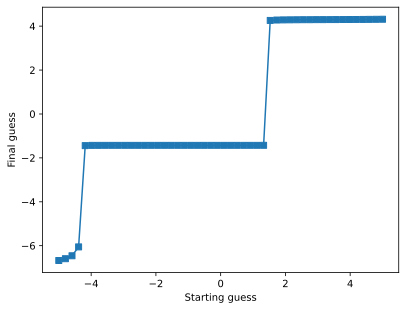

In [23]:
# Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):
  
  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
  
  # store the final guess
  finalres[idx] = localmin


# plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

In [25]:
np.set_printoptions(suppress=True)

In [26]:
np.linspace(1e-10,1e-1,50)

array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])

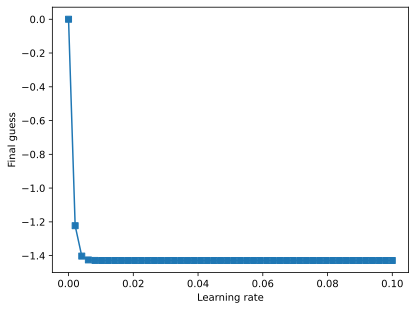

In [28]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):
  
  # force starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad
  
  # store the final guess
  finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [29]:
np.round(np.linspace(10,500,40))

array([ 10.,  23.,  35.,  48.,  60.,  73.,  85.,  98., 111., 123., 136.,
       148., 161., 173., 186., 198., 211., 224., 236., 249., 261., 274.,
       286., 299., 312., 324., 337., 349., 362., 374., 387., 399., 412.,
       425., 437., 450., 462., 475., 487., 500.])

In [30]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):
  
    # run through training (again fixing starting location)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad
    
    # store the final guess
    finalres[Lidx,Eidx] = localmin


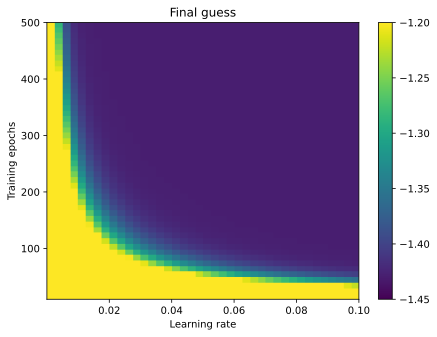

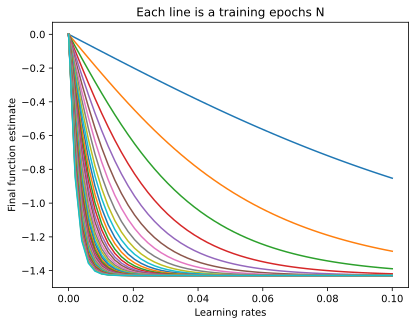

In [31]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

# Additional explorations

In [ ]:
# 1) In experiment 3, set the starting location to be 1.6. Re-run the experiment and the image. You'll need to re-adjust 
#    the figure color limits; check the line plots at the top of the code to determine a useful color range. Does the new
#    starting value change your conclusions about the interaction between learning rate and training epochs?
# 
# 2) In the same experiment, now change the starting location to be random (use code: np.random.choice(x,1)). How do these
#    results look? Are you surprised? Are the results of this experiment still interpretable and what does this tell you 
#    about running experiments in DL?
# 

In [39]:
np.random.choice(x,1)

array([-1.85353967])

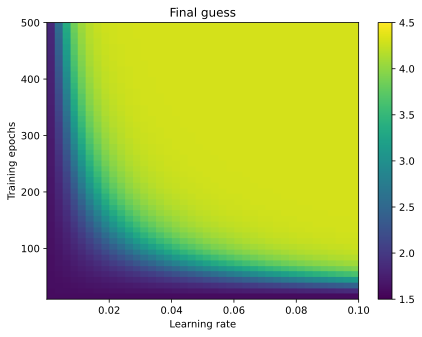

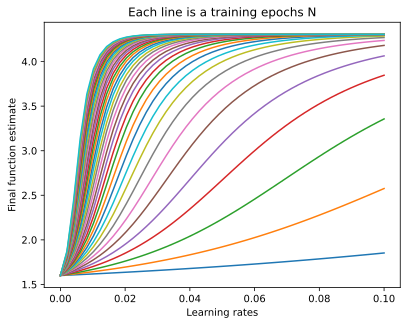

In [44]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):
  
    # run through training (again fixing starting location)
    localmin = 1.6
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad
    
    # store the final guess
    finalres[Lidx,Eidx] = localmin
    
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=1.5,vmax=4.5)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()



In [40]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):
  
    # run through training (again fixing starting location)
    localmin = np.random.choice(x,1)#1.6
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad
    
    # store the final guess
    finalres[Lidx,Eidx] = localmin



C:\Users\pmiha\AppData\Local\Temp\ipykernel_16044\2321111308.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  finalres[Lidx,Eidx] = localmin


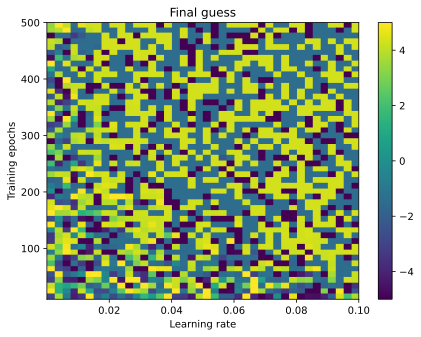

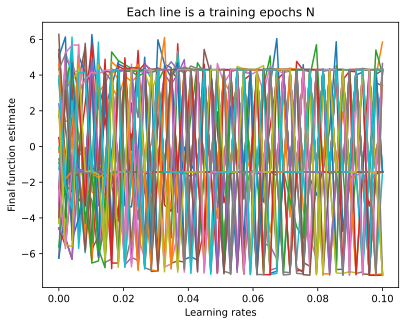

In [42]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-5,vmax=5)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()